In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


ruleta = {0:'g',1:'r',2:'b',3:'r',4:'b',5:'r',6:'b',7:'r',
            8:'b',9:'r',10:'b',11:'b',12:'r',13:'b',14:'r',15:'b',16:'r',
            17:'b',18:'r',19:'r',20:'b',21:'r',22:'b',23:'r',24:'b',25:'r',
            26:'b',27:'r',28:'b',29:'b',30:'r',31:'b',32:'r',33:'b',34:'r',
            35:'b',36:'r'}

def girar_ruleta():
    numero = random.randint(0,36)
    return numero

dinero = 1000
tiradas = 50
num = np.array([], dtype=int)
din_sr = np.array([dinero], dtype=int)
din_mg = np.array([dinero], dtype=int)
din_fb = np.array([dinero], dtype=int)
din_jb = np.array([dinero], dtype=int)
din_mgi = np.array([dinero], dtype=int)
num = np.array([], dtype=int)


def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

def siempre_rojo(color, apuesta):
    if color == 'r':
        return apuesta
    else:
        return -apuesta

def martingala(apuesta, color, pierde = 1, i = 1):
    global din_mg
    global num
    global tiradas
    if color == ruleta.get(num[i]):
        din_mg = np.append(din_mg, [din_mg[i-1] + apuesta*pierde])
        pierde = 1
    else:
        din_mg = np.append(din_mg, [din_mg[i-1] - apuesta*pierde])
        pierde = pierde + 1
    i = i + 1
    if i < tiradas:
        return martingala(apuesta, color, pierde, i)

def fibonacci(apuesta, color, pierde = 1, i = 1):
    global din_fb
    global num
    global tiradas
    if color == ruleta.get(num[i]):
        din_fb = np.append(din_fb, [din_fb[i-1] + apuesta*fib(pierde)])
        pierde = 1
    else:
        din_fb = np.append(din_fb, [din_fb[i-1] - apuesta*fib(pierde)])
        pierde = pierde + 1
    i = i + 1
    if i < tiradas:
        return fibonacci(apuesta, color, pierde, i)

def james_bond(n, apuesta):
    if n >= 19 and n <= 36:
        return apuesta * 8
    elif n == 0:
        return apuesta * 16
    elif n >=13 and n <= 18:
        return apuesta * 10
    else:
        return (apuesta * -20)

def martingalainvertida(apuesta, color, pierde = 1, i = 1):
    global din_mgi
    global num
    global tiradas
    if color == ruleta.get(num[i]):
        din_mg = np.append(din_mgi, [din_mgi[i-1] + apuesta*pierde])
        pierde = pierde + 1
    else:
        din_mg = np.append(din_mgi, [din_mgi[i-1] - apuesta*pierde])
        pierde = 1
    i = i + 1
    if i < tiradas:
        return martingalainvertida(apuesta, color, pierde, i)
        
i = 0

#finito
#while din_mg > 0 or din_mgi > 0 or din_fb > 0 or din_jb > 0 or din_sr > 0:
while din_jb[i] > 19:
    n = girar_ruleta()
    num = np.append(num, [n])
    #din_sr = np.append(din_sr, [din_sr[i] + siempre_rojo(ruleta.get(n), 1)])
    din_jb = np.append(din_jb, [din_jb[i] + james_bond(n, 1)])
    i = i + 1
 
 #infinito
for i in range(1,tiradas):
    n, c = girar_ruleta()
    num = np.append(num, [n])
    col = np.append(col, [c])
    din = np.append(din, [din[i-1] + siempre_rojo(c, 1)])
    

TypeError: ignored

-20
-40
+ 80
-20
+ 40
+ 20
+ 20
+ 20
-20
-40
-80
+ 160
-20
+ 40
-20
-40
-80
-160
-320
-640
+ 1280
+ 20
-20
+ 40
-20
-40
-80
+ 160
-20
-40


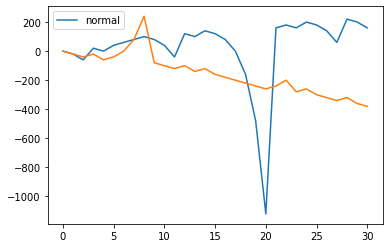

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


ruleta = {0:'g',1:'r',2:'b',3:'r',4:'b',5:'r',6:'b',7:'r',
            8:'b',9:'r',10:'b',11:'b',12:'r',13:'b',14:'r',15:'b',16:'r',
            17:'b',18:'r',19:'r',20:'b',21:'r',22:'b',23:'r',24:'b',25:'r',
            26:'b',27:'r',28:'b',29:'b',30:'r',31:'b',32:'r',33:'b',34:'r',
            35:'b',36:'r'}

def girar_ruleta():
    numero = random.randint(0,36)
    return numero

dinero = 0
tiradas = 30
num = np.array([], dtype=int)
din_sr = np.array([dinero], dtype=int)
din_mg = np.array([dinero], dtype=int)
win_r_mg = 0
din_fb = np.array([dinero], dtype=int)
win_r_fb = 0
din_jb = np.array([dinero], dtype=int)
din_mgi = np.array([dinero], dtype=int)
win_r_mgi = 0
num = np.array([], dtype=int)


def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

def siempre_rojo(color, apuesta):
    if color == 'r':
        return apuesta
    else:
        return -apuesta

def martingala(apuesta, color, n):
    global win_r_mg
    if color == ruleta.get(n):
        gano = apuesta * pow(2, win_r_mg)
        win_r_mg = 0
        print('+', gano)
        return gano
    else:
        perdio = -apuesta * pow(2, win_r_mg)
        print(perdio)
        win_r_mg = win_r_mg + 1
        return perdio
    

def fibonacci(apuesta, color, pierde = 1, i = 0):
    global din_fb
    global num
    global tiradas
    if color == ruleta.get(num[i]):
        din_fb = np.append(din_fb, [din_fb[i] + apuesta*fib(pierde)])
        pierde = 1
    else:
        din_fb = np.append(din_fb, [din_fb[i] - apuesta*fib(pierde)])
        pierde = pierde + 1
    i = i + 1
    if i < tiradas:
        return fibonacci(apuesta, color, pierde, i)

def james_bond(n, apuesta):
    if n >= 19 and n <= 36:
        return apuesta * 8
    elif n == 0:
        return apuesta * 16
    elif n >=13 and n <= 18:
        return apuesta * 10
    else:
        return (apuesta * -20)

def martingalainvertida(apuesta, color, n):
    global win_r_mgi
    if color == ruleta.get(n):
        gano = apuesta * pow(2, win_r_mgi)
        win_r_mgi = win_r_mgi + 1
        
        return gano
    else:
        perdio = -apuesta * pow(2, win_r_mgi)
        win_r_mgi = 0
        return perdio
        
 
 #infinito

for i in range(0,tiradas):
    n = girar_ruleta()
    num = np.append(num, [n])
    din_sr = np.append(din_sr, [din_sr[i] + siempre_rojo(ruleta.get(n), 20)])
    din_jb = np.append(din_jb, [din_jb[i] + james_bond(n, 1)])
    din_mg = np.append(din_mg, [din_mg[i] + martingala(20, 'r', n)])
    din_mgi = np.append(din_mgi, [din_mgi[i] + martingalainvertida(20, 'r', n)])




plt.plot(range(len(din_mg)), din_mg, label ="normal")
plt.plot(range(len(din_mgi)), din_mgi)
plt.legend()
plt.show()


No handles with labels found to put in legend.


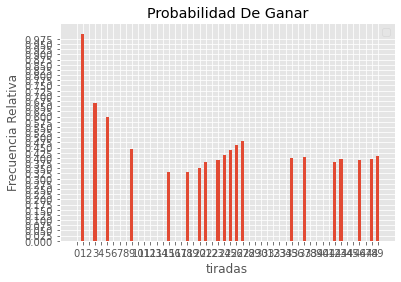

No handles with labels found to put in legend.


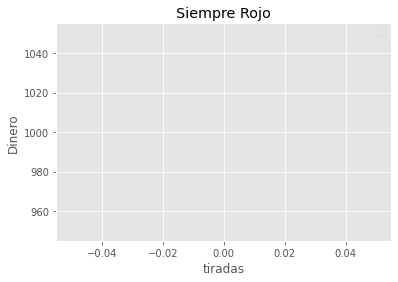

No handles with labels found to put in legend.


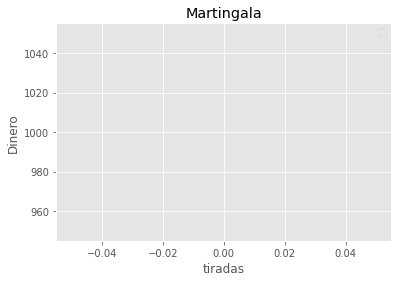

No handles with labels found to put in legend.


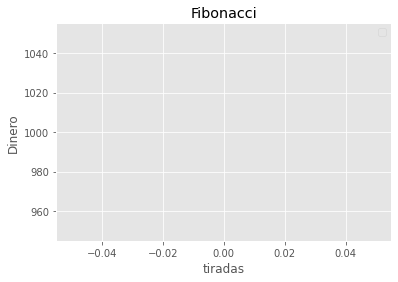

No handles with labels found to put in legend.


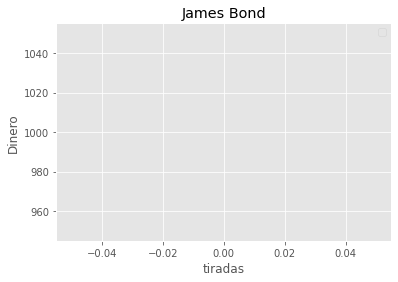

In [ ]:
#Gráfico frecuencia relativa y caja


import numpy as np
import matplotlib.pyplot as plt
import random


ruleta = {0:'g',1:'r',2:'b',3:'r',4:'b',5:'r',6:'b',7:'r',
            8:'b',9:'r',10:'b',11:'b',12:'r',13:'b',14:'r',15:'b',16:'r',
            17:'b',18:'r',19:'r',20:'b',21:'r',22:'b',23:'r',24:'b',25:'r',
            26:'b',27:'r',28:'b',29:'b',30:'r',31:'b',32:'r',33:'b',34:'r',
            35:'b',36:'r'}

def girar_ruleta():
    numero = random.randint(0,36)
    return numero

dinero = 1000
tiradas = 50
num = np.array([])
din_sr = np.array([dinero])
din_mg = np.array([dinero])
din_fib = np.array([dinero])
din_jb = np.array([dinero])
frec_abs_ganar = 0
frec_rel_ganar = np.zeros(tiradas)

def siempre_rojo(color, apuesta):
    if color == 'r':
        return apuesta
    else:
        return -apuesta


for i in range(1,tiradas):
    n = girar_ruleta()
    num = np.append(num, [n])
    if ruleta.get(n) == "r":
        frec_abs_ganar += 1
        frec_rel_ganar[i] = frec_abs_ganar / i

plt.style.use("ggplot")

x = np.arange(tiradas)    
y = frec_rel_ganar
plt.bar(x, y, width=0.5)
plt.title("Probabilidad De Ganar")
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.yticks(np.arange(0,1,0.025))
plt.xticks(range(tiradas))
#plt.margins(y=-0.4)
plt.legend()
plt.show()

plt.plot(range(len(din_sr)),din_sr)
plt.title("Siempre Rojo")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
#plt.margins(y=-0.4)
plt.legend()
plt.show()

plt.plot(range(len(din_mg)),din_mg)
plt.title("Martingala")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
#plt.margins(y=-0.4)
plt.legend()
plt.show()

plt.plot(range(len(din_fib)),din_fib)
plt.title("Fibonacci")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
#plt.margins(y=-0.4)
plt.legend()
plt.show()

plt.plot(range(len(din_jb)),din_jb)
plt.title("James Bond")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
#plt.margins(y=-0.4)
plt.legend()
plt.show()
